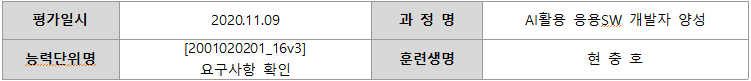

In [1]:
from IPython.display import Image
Image("picture.png")


### 정적 사이트 ( Server rendering )
- html data를 가지고 온다
- 받아온 데이터에서 적절한 값을 추출하는 과정 => parsing
- blog 검색결과
- HTML Tag : ol#reallink>div>(li.up>a[href="#"]{실시간 검색어$$})*5
- HTML 구조를 계층적으로 표현하는 DOM(Document Object Model) 형태이다.
- html>body>div>ul>li...
- html 파일 불러오기 => requests.get(URL)
- 데이터 파싱 => bs = BeautiSoup([html데이터], "html.parser") => bs.select([selector])

### 동적 사이트 ( Client rendering )
- 어디에선가(_____=>API) 찾는 과정
- 데이터를 불러오고
- 데이터를 추출한다 => parsing

### 다음 Blog => 검색어 : 파이썬

In [2]:
import requests
from bs4 import BeautifulSoup

URL = "https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%ED%8C%8C%EC%9D%B4%EC%8D%AC"
res = requests.get(URL)
# print(res.text) # html 나옴

dom = BeautifulSoup(res.text, "html.parser")

post_elements = dom.select("div.coll_cont>ul.list_info>li")

for post_element in post_elements:
    title_element = post_element.select_one("div.wrap_tit>a")
    title = title_element.text
    url = title_element.attrs.get("href")
    print(title)
    print(url)
    

세종사이버대 컴퓨터AI공학과
https://keyword.ad.daum.net/short/clk?q=j22E2fL3UCZx5rq-n5d5fvMFSAfd76tFDfQvjGQ6pUGhsz8iwD9PQLOR-niUGIgId7CCRAiMouZlFuPetCweb67TQFih7idFBikGj.Vn9ITX4QP.6agHwQYzSIGAkb9DQdXHX-TZPRFIcRuXUvJECWtamEmZk_BxHCeyFZot1hJw6lFC7xQsvrDQPCdnujPYUikmfQei.L.Wo1-PUjSZTXMIoCNoHyBXTVfot1-wmV-egmHnnyrRYueKpFSnoOeZE8aRBoqFXwjWIRa7NIOakuiJufGkHckIwhylJQ8glEI64l6.us8mtEjhWi_gJtM9s8b_l9s94MGh-yTEP3dpua6z9glD13QIvwM7B_9vk_BllDIS9NJnbHLbjW6aSxMMybk0&s=https%3A%2F%2Fhome.sjcu.ac.kr%2Fko%2Fcms%2FFR_CON%2Findex.do%3FMENU_ID%3D2470%26utm_source%3DSA%26utm_medium%3DDAUM_PC%26utm_campaign%3DSPRING1%26utm_content%3DKEYWORD%26utm_term%3D%ED%8C%8C%EC%9D%B4%EC%8D%AC%26DMKW%3D%25ED%258C%258C%25EC%259D%25B4%25EC%258D%25AC%26DMSKW%3D%25ED%258C%258C%25EC%259D%25B4%25EC%258D%25AC%26DMCOL%3DPM
가비아 파이썬 호스팅 오픈
https://keyword.ad.daum.net/short/clk?q=j3Zz5CBs.9cJbIbzNuPWIWILxV5JyXvR_kB5vWxX3saOJCpLpoBy6aFw1EYN-48BWIgLVvq5QnDfx5F1LV-ZEtfXz9UWtB2M7bwV4FIgl27VFXR2.2nlKenhDU__fzJoVAL4ZS_4YMYan5w3KWion_aqDvpWGQz3hvBVk

### 관련 검색어 텍스트 추출

In [3]:
[
    related_keyword_element.text
    for related_keyword_element
    in dom.select(".wsn")
]

['파이썬 강좌',
 '파이썬 프로그래밍',
 '파이썬 책',
 '파이썬 뱀',
 '파이썬 다운로드',
 '파이썬 예제',
 '파이썬 맵',
 '파이썬 아나콘다',
 '파이썬 설치',
 '파이썬 자격증',
 '파이썬 활용',
 '파일썬',
 'python',
 '파이썬 학원',
 '파이썬 코딩',
 '파이썬 기초',
 '파이썬 강의',
 '파이썬 R',
 '파이썬 교재',
 '파이썬 주식',
 '파이썬 강좌',
 '파이썬 프로그래밍',
 '파이썬 책',
 '파이썬 뱀',
 '파이썬 다운로드',
 '파이썬 예제',
 '파이썬 맵',
 '파이썬 아나콘다',
 '파이썬 설치',
 '파이썬 자격증',
 '파이썬 활용',
 '파일썬',
 'python',
 '파이썬 학원',
 '파이썬 코딩',
 '파이썬 기초',
 '파이썬 강의',
 '파이썬 R',
 '파이썬 교재',
 '파이썬 주식']

### 동적 사이트 : https://www.yogiyo.co.kr/                                                 
- 서구 계룡로 636
- 음식점 리스트 크롤링
- 새로고침하면 빙글빙글 ... 돌면서 서버로 부터 데이터를 불러오는 동적 사이트 이다.
- 개발자 도구 > 네트워크 탭 > 새로고침 > ?item=60&alt = ~~~~~ 주소는 
- https://www.yogiyo.co.kr/api/v1/restaurants-geo/?items=60&lat=36.3385369684327&lng=127.392457108024&order=rank&page=1&search=

In [7]:
url = "https://www.yogiyo.co.kr/api/v1/restaurants-geo/?items=60&lat=36.3385369684327&lng=127.392457108024&order=rank&page=1&search="
headers = {
    "x-apikey": "iphoneap",
    "x-apisecret" : "fe5183cc3dea12bd0ce299cf110a75a2"
}

res = requests.get(url,headers=headers)
yogiyo = res.json()
# yogiyo



In [5]:
[
    restaurant.get("name")
    for restaurant
    in yogiyo.get("restaurants")
]

['푸라닭-대전괴정점',
 '신사천성사천냉면',
 '피자마켓-대전서구점',
 'BBQ-대전탄방행운점',
 '코리엔탈깻잎두마리치킨-둔산점',
 '더바스켓-둔산점',
 '혼밥대왕-서구점',
 '바른초밥-동구점',
 '유로코피자-대전서구점',
 '청춘회포차',
 '인로코카페',
 '불닭발땡초동대문엽기떡볶이-태평점',
 '심야회',
 'BHC-대전괴정점',
 '24시오후청',
 '달토끼의떡볶이흡입구역-태평점',
 '푸라닭-대전탄방점',
 'BHC-가장내동점',
 '네네치킨-가장내동점',
 '상하이마라탕',
 '만년닭강정-둔산직영점',
 '떼루아파스타',
 '피자헛-대전탄방점',
 '맘스터치-대전둔산점',
 '카페수다',
 '설빙-대전시청점',
 '죠스떡볶이-대전오류점',
 '네오피자-대전서구점',
 '응급실국물떡볶이-탄방점',
 '역전우동0410-대전탄방역점',
 '이비가짬뽕-시청점',
 '15000족발-월평점',
 '태원중화요리',
 '맘스터치-대전탄방점',
 '바르다김선생-괴정점',
 '버거킹-대전용문역점',
 '응급실국물떡볶이-대전둔산점',
 '어장관리',
 '항아리보쌈-괴정한민점',
 '빅스타피자-대전탄방점',
 '신전떡볶이-배재대점',
 '바르다김선생-대전시청점',
 '큰맘할매순대국-배재대점',
 '모락모락MORAKMORAK',
 '쫄면주는삼겹본능-대전갈마점',
 '굽네치킨&피자-둔산1호점',
 '멕시카나-롯데괴정점',
 '스쿨푸드-대전시청점',
 '롯데리아-대전중촌점',
 '맘스터치-대전태평점',
 '다락마을-스테이크&파스타',
 '롯데리아-홈플러스대전탄방점',
 '고기랑냉면&고기떡볶이',
 '행복돈카츠-본점',
 '위치커피-탄방점',
 '미세노센세-둔산점',
 '베이징-태평점',
 '신가네매운떡볶이-괴정점',
 '차이나유-내동',
 '청년피자-대전서구점']

### Q1 : naver blog 에서 검색어 "파이썬"으로 검색된 주소와 타이틀을 추출하시오.
    

In [6]:
import requests
from bs4 import BeautifulSoup
response = requests.get("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC")
dom = BeautifulSoup(response.text, "html.parser")
# dom
dom

post_elements = dom.select("div._panel[data-index=topic0] > ul.lst_total._list_base > li.bx._svp_item ")
#print(post_element)
for post_element in post_elements:
    title_element = post_element.select_one("div.total_wrap.api_ani_send > a.api_txt_lines.total_tit")
    title = title_element.text
    url = title_element.attrs.get("href")
    print(title)
    print(url)

 


파이썬(Phython)이 스타트업에게 인기있는 이유 7가지
http://blog.wishket.com/%ED%8C%8C%EC%9D%B4%EC%8D%ACpython%EC%9D%B4-%EC%8A%A4%ED%83%80%ED%8A%B8%EC%97%85%EC%97%90%EA%B2%8C-%EC%9D%B8%EA%B8%B0%EC%9E%88%EB%8A%94-%EC%9D%B4%EC%9C%A0-7%EA%B0%80%EC%A7%80/
파이썬 학원 중요시 여겨야할 부분!
https://blog.naver.com/sujung1540/222124538409
파이썬, R이 필요 없는 비전공자를 위한 데이터 분석 최적화 프로그램을 소개합니다.
https://post.naver.com/viewer/postView.nhn?volumeNo=29326023&memberNo=607398&vType=VERTICAL
파이썬(Python) - 아나콘다(Anaconda) 설치하기 - 윈도우편
https://blog.naver.com/chandong83/222128977072
파이썬 학원 실력이 곧 스펙
https://blog.naver.com/bayern/222123658846
파이썬 웹 프로그래밍 Django로 입문
https://blog.naver.com/urmyver/222079389364
전주코딩학원에서 블록코딩 파이썬 C언어 C++ 함께 배워봐요
https://blog.naver.com/stupid1714/222120011506
요새 뜨는 코딩, 파이썬이란 무엇일까요?
https://adcr.naver.com/adcr?x=SWYyv7f94flrXuFefxD2VP///w==kfg0LGwUI/uAgFx0z+i6Uf/KROTpwK7pH16zQJPy8Um1i0OTyeBznGAAcCm04GC+TmRD3RgPZfxaBwNMANEe3TuSlPcHbHzflyoeEfyVbObmsdk+HcrcsgLTFoWJJLxPkxhdVha8UfLE61K5g6KApidSnFHRi+kBpT0WUgt6hIbHasyzId9hgaFGF+